## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## 2. Load Data Set

In [2]:
data_frame = pd.read_csv("heart.csv")

## 3. Preview And Understand Data

In [3]:
data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Rename Columns

In [6]:
data_frame.rename(columns={"age": "Age", "sex": "Gender", "cp": "ChestPainType", "trestbps": "RestingBP",
                          "chol": "SerumCholestoral", "fbs": "FastingBP", "restecg": "RestingECG", "thalach": "MaxHeartRate",
                          "exang": "Excercise", "oldpeak": "Depression", "slope": "Slope", "ca": "Vessels", "thal": "Thalassemia",
                          "target": "Target"}, inplace=True)

## 4. Basic EDA

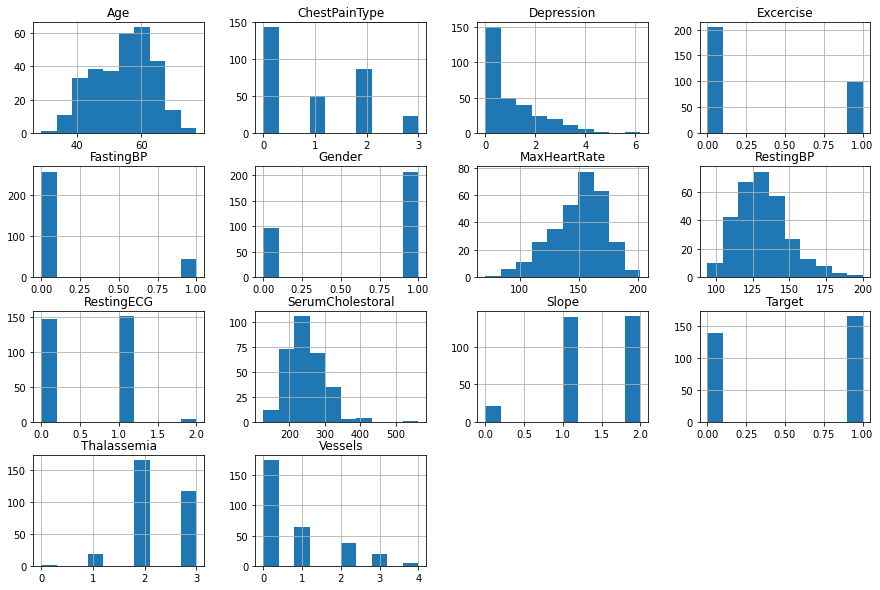

In [7]:
data_frame.hist(figsize=(15,10))
plt.show()

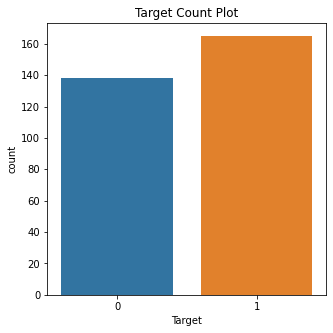

In [8]:
plt.figure(figsize=(5, 5))
sns.countplot(x="Target", data=data_frame)
plt.title("Target Count Plot")
plt.show()

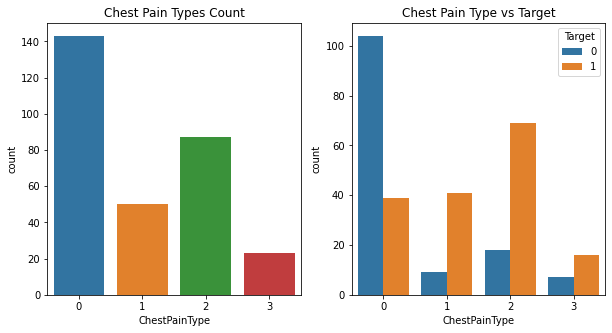

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="ChestPainType", data=data_frame)
plt.title("Chest Pain Types Count")
plt.subplot(1,2,2)
sns.countplot(x="ChestPainType", hue="Target", data=data_frame)
plt.title("Chest Pain Type vs Target")
plt.show()

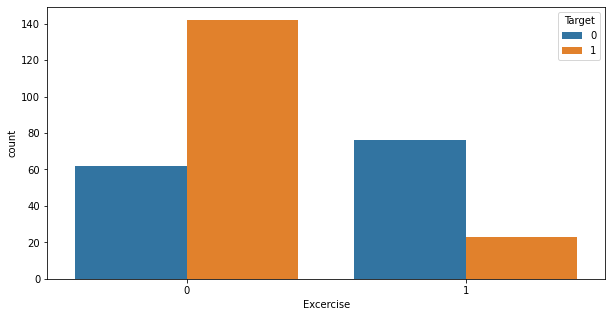

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Excercise", hue="Target", data=data_frame)

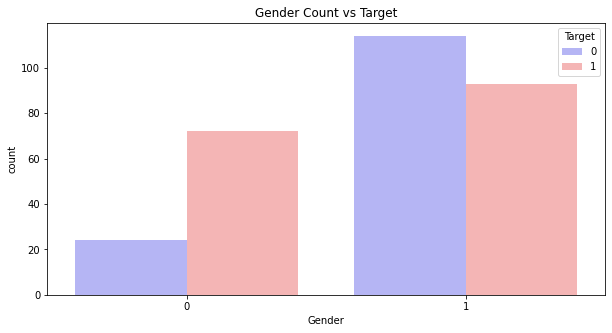

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Gender", hue="Target", data=data_frame, palette="bwr")
plt.title("Gender Count vs Target")
plt.show()

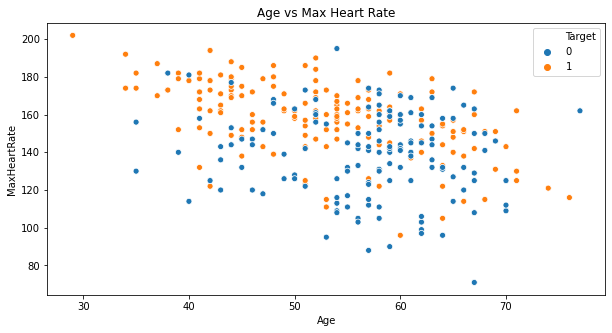

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age", y="MaxHeartRate", hue="Target", data=data_frame)
plt.title("Age vs Max Heart Rate")
plt.show()

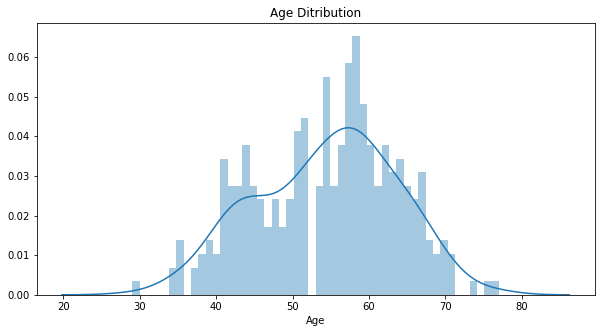

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(data_frame["Age"], bins=50)
plt.title("Age Ditribution")
plt.show()

In [14]:
young_age = data_frame[(data_frame["Age"] >= 29) & (data_frame["Age"] < 40)]
middle_age = data_frame[(data_frame["Age"] >= 40) & (data_frame["Age"] < 55)]
elder_age = data_frame[(data_frame["Age"] > 55)]

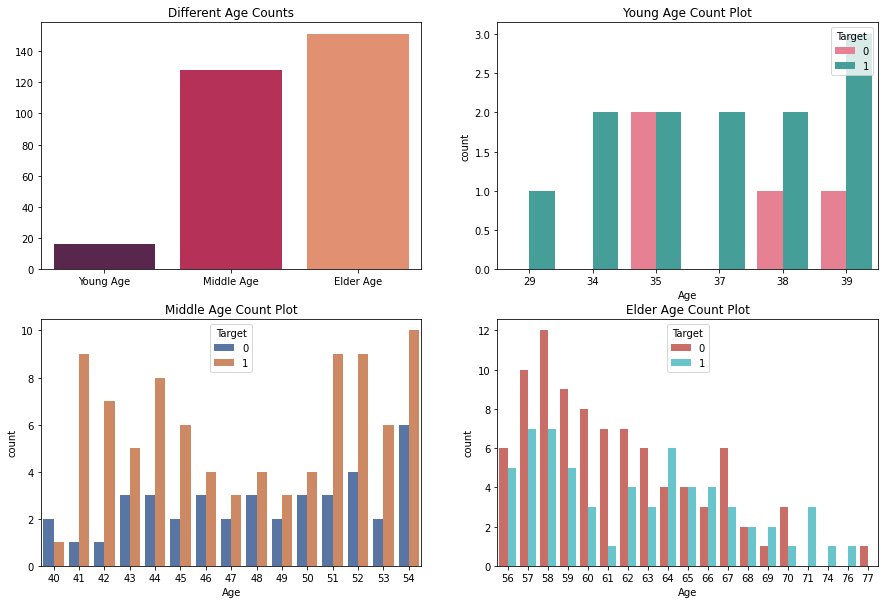

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=["Young Age", "Middle Age", "Elder Age"], y=[len(young_age), len(middle_age), len(elder_age)], palette="rocket")
plt.title("Different Age Counts")
plt.subplot(2,2,2)
sns.countplot(x=young_age["Age"], hue=young_age["Target"], data=data_frame, palette="husl")
plt.title("Young Age Count Plot")
plt.subplot(2,2,3)
sns.countplot(x=middle_age["Age"], hue=middle_age["Target"], data=data_frame, palette="deep")
plt.title("Middle Age Count Plot")
plt.subplot(2,2,4)
sns.countplot(x=elder_age["Age"], hue=elder_age["Target"], data=data_frame, palette="hls")
plt.title("Elder Age Count Plot")
plt.show()

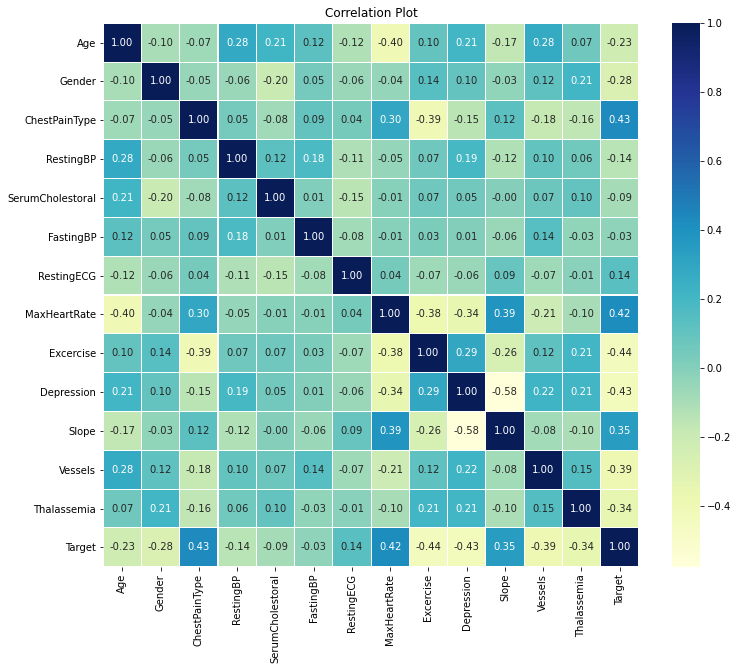

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(data_frame.corr(), linewidths=0.05, fmt= ".2f", cmap="YlGnBu", annot=True)
plt.title("Correlation Plot")
plt.show()

## 5. Feature Engineering

In [17]:
data_frame = pd.get_dummies(data_frame, columns=["ChestPainType", "RestingECG", "Excercise", "Vessels", "Slope", "Thalassemia"])

In [18]:
X = data_frame.drop("Target", axis=1)
Y = data_frame["Target"]

### Few column values are scaled, these scaled values will be used for KNN algorithm

In [19]:
min_max_scaler = MinMaxScaler()
data_frame["RestingBP"] = min_max_scaler.fit_transform(data_frame["RestingBP"].values.reshape(-1, 1))
data_frame["Depression"] = min_max_scaler.fit_transform(data_frame["Depression"].values.reshape(-1, 1))
data_frame["MaxHeartRate"] = min_max_scaler.fit_transform(data_frame["MaxHeartRate"].values.reshape(-1, 1))
data_frame["SerumCholestoral"] = min_max_scaler.fit_transform(data_frame["SerumCholestoral"].values.reshape(-1, 1))

In [20]:
X_Scale = data_frame.drop("Target", axis=1)
Y_Scale = data_frame["Target"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train_scale, x_test_scale, y_train_scale, y_test_scale = train_test_split(X_Scale, Y_Scale, test_size=0.2, random_state=42)

In [22]:
def model_evaluation(y_test, y_preds, model_name):
    
    accuracy = accuracy_score(y_test, y_preds) * 100
    print("************ Accuracy Score ************")
    print(accuracy)
    print("\n\n************ Classification Report ************")
    print(classification_report(y_test, y_preds))
    print("\n\n************ Confusion Matrix ************")
    sns.heatmap(confusion_matrix(y_preds, y_test), annot = True, fmt = ".0f", cmap = "YlGnBu")
    plt.title("{} Validation Matrix\n\n".format(model_name))
    plt.show()
    
    return accuracy

## 6. Model Fitting

#### Random Forest Classifier

In [23]:
random_forest_model = RandomForestClassifier(criterion="entropy", max_depth=5)
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)

************ Accuracy Score ************
88.52459016393442


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



************ Confusion Matrix ************


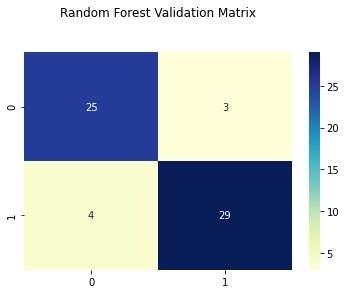

In [24]:
rf_accuracy = model_evaluation(y_test, random_forest_pred, "Random Forest")

#### Logistic Regression

In [25]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
lr_model_preds = logistic_regression_model.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


************ Accuracy Score ************
88.52459016393442


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



************ Confusion Matrix ************


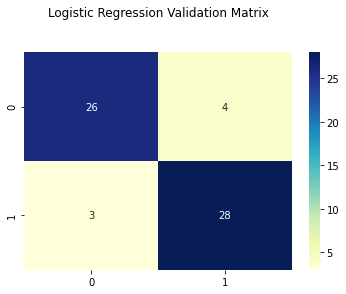

In [26]:
lr_accuracy = model_evaluation(y_test, lr_model_preds, "Logistic Regression")

#### Support Vector Classifier

In [27]:
svm_model = SVC(kernel="linear")
svm_model.fit(x_train, y_train)
svm_preds = svm_model.predict(x_test)

************ Accuracy Score ************
86.88524590163934


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



************ Confusion Matrix ************


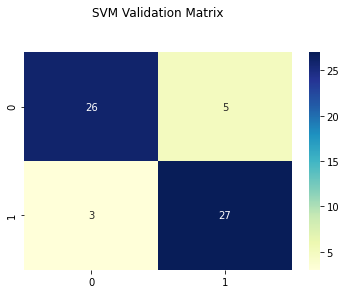

In [28]:
svm_accuracy = model_evaluation(y_test, svm_preds, "SVM")

#### Decision Tree Classifier

In [29]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy")
decision_tree_model.fit(x_train, y_train)
dt_preds = decision_tree_model.predict(x_test)

************ Accuracy Score ************
80.32786885245902


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



************ Confusion Matrix ************


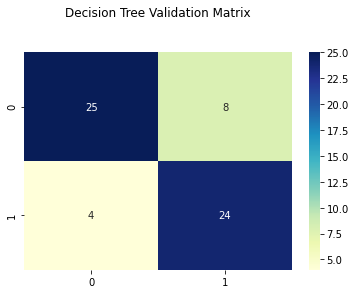

In [30]:
dt_accuracy = model_evaluation(y_test, dt_preds, "Decision Tree")

#### KNN

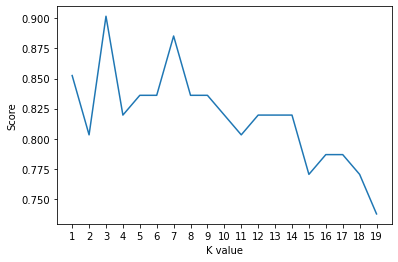

Best KNN Model Score: 90.1639344262295
Best K Value: 3


In [31]:
score_list = []
for i in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn_model.fit(x_train_scale, y_train_scale)
    score_list.append(knn_model.score(x_test_scale, y_test_scale))
    
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

accuracy = max(score_list)
best_k = score_list.index(accuracy) + 1
print("Best KNN Model Score: {}".format(accuracy * 100))
print("Best K Value: {}".format(best_k))


In [32]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train_scale, y_train_scale)
knn_preds = knn_model.predict(x_test_scale)

************ Accuracy Score ************
90.1639344262295


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



************ Confusion Matrix ************


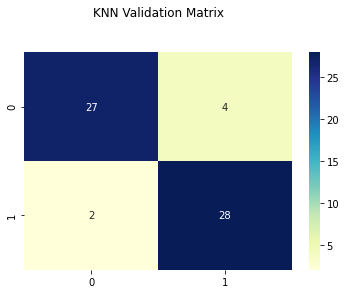

In [33]:
knn_accuracy = model_evaluation(y_test_scale, knn_preds, "KNN")

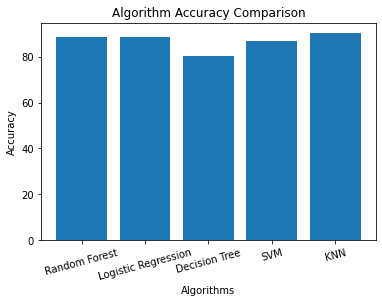

In [34]:
x = ["Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
y = [rf_accuracy, lr_accuracy, dt_accuracy, svm_accuracy, knn_accuracy]
plt.bar(x=x, height=y)
plt.title("Algorithm Accuracy Comparison")
plt.xticks(rotation=15)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()